<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48048 entries, 2015-01-03 01:00:00 to 2020-06-27 00:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  48048 non-null  float64
 1   T2M_toc     48048 non-null  float64
 2   QV2M_toc    48048 non-null  float64
 3   TQL_toc     48048 non-null  float64
 4   W2M_toc     48048 non-null  float64
 5   T2M_san     48048 non-null  float64
 6   QV2M_san    48048 non-null  float64
 7   TQL_san     48048 non-null  float64
 8   W2M_san     48048 non-null  float64
 9   T2M_dav     48048 non-null  float64
 10  QV2M_dav    48048 non-null  float64
 11  TQL_dav     48048 non-null  float64
 12  W2M_dav     48048 non-null  float64
 13  Holiday_ID  48048 non-null  int64  
 14  holiday     48048 non-null  int64  
 15  school      48048 non-null  int64  
dtypes: float64(13), int64(3)
memory usage: 6.2 MB
None


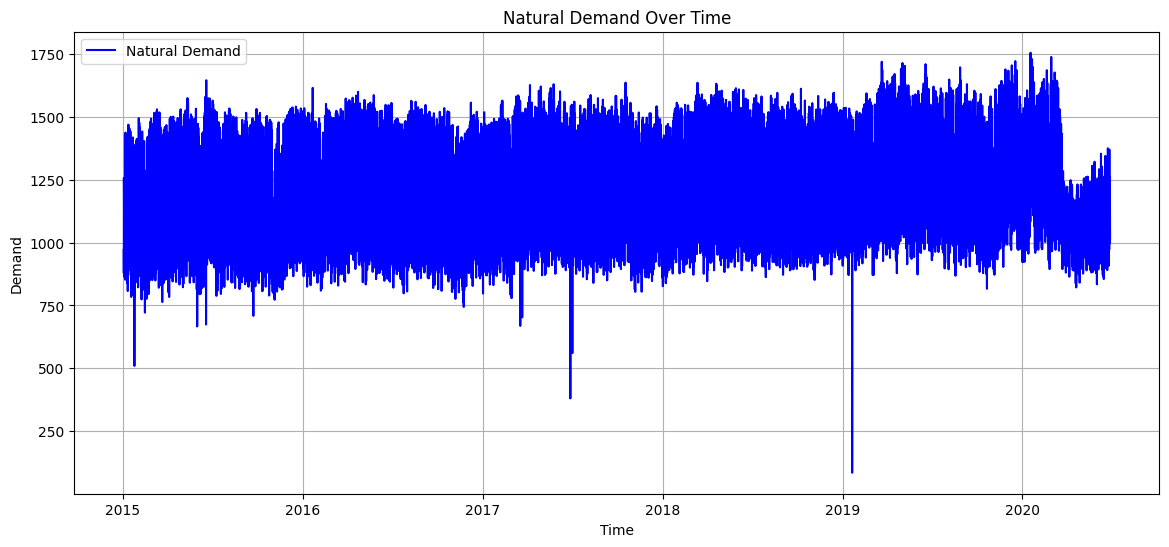

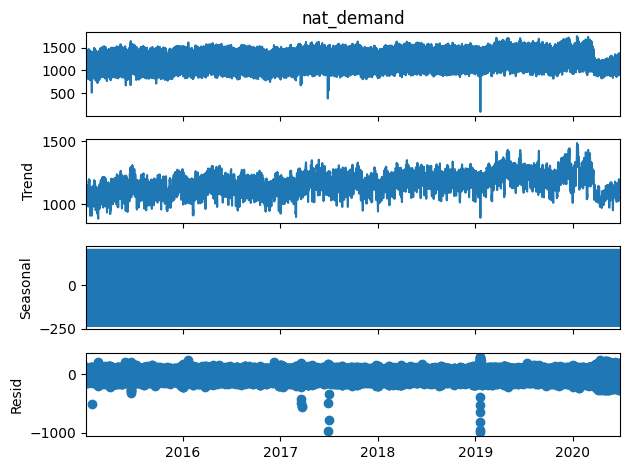

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


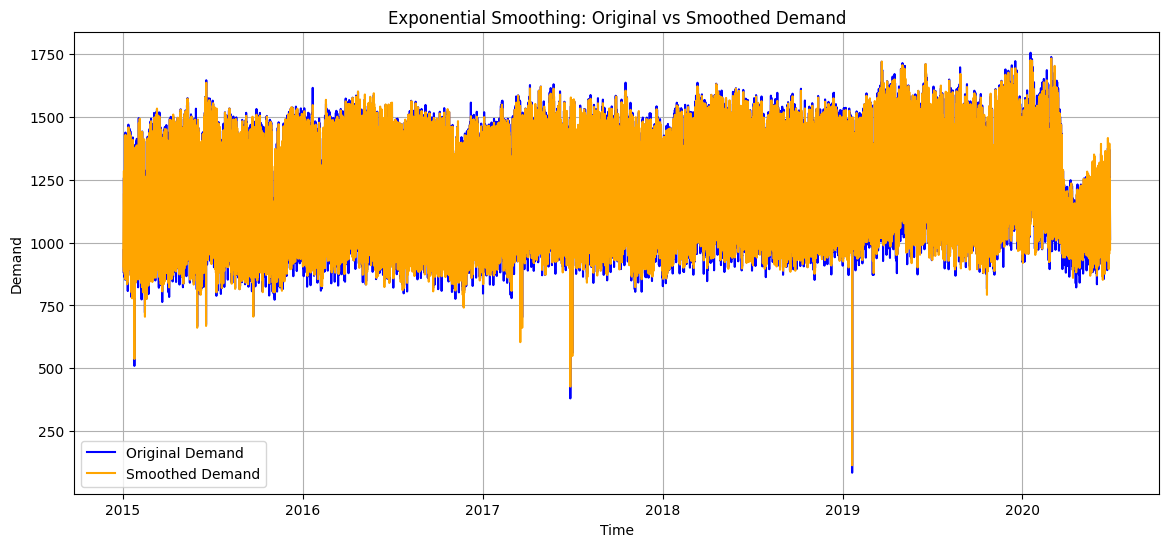

Naive Bayes Accuracy: 0.7925078043704474
Decision Tree Accuracy: 0.7814776274713839
SVM Accuracy: 0.826222684703434
Linear Regression MSE: 18505.611861746907
Linear Regression R^2: 0.49862248323542224
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


961/961 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 928149.1875 - mae: 874.9483 - val_loss: 72922.1484 - val_mae: 212.8969
Epoch 2/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 93213.4688 - mae: 241.9030 - val_loss: 35155.5469 - val_mae: 147.3147
Epoch 3/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 64727.0742 - mae: 201.5098 - val_loss: 22801.7051 - val_mae: 119.7336
Epoch 4/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 52916.5547 - mae: 183.7090 - val_loss: 19691.6191 - val_mae: 113.1042
Epoch 5/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 50114.8906 - mae: 177.6065 - val_loss: 18488.0508 - val_mae: 110.2463
Epoch 6/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 50507.4570 - mae: 177.7752 - val_loss: 17966.2832 - val_mae: 108.1853
Epoch 7/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 48463.1484 - mae: 174.4417 - val_loss: 18031.7559 - val_mae: 107.6136
Epoch 8/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 48007.3125 - mae: 173.4866 - val_loss: 1

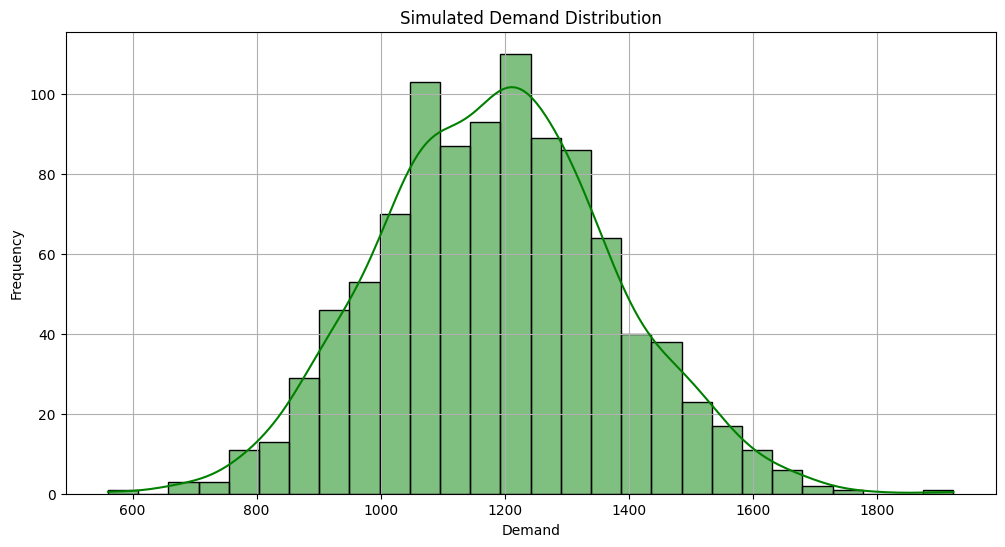

In [ ]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Analysis Libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Supervised Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Optimization Libraries
from scipy.optimize import linprog
# Load the dataset
continuous_data = pd.read_csv("/content/continuous dataset.csv")

# Convert datetime column to datetime object and set it as index
continuous_data['datetime'] = pd.to_datetime(continuous_data['datetime'])
continuous_data.set_index('datetime', inplace=True)

# Display dataset summary
print(continuous_data.info())
# Natural demand time series
nat_demand = continuous_data['nat_demand']

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(nat_demand, label='Natural Demand', color='blue')
plt.title('Natural Demand Over Time')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()
plt.grid()
plt.show()

# Decomposition
decomposition = seasonal_decompose(nat_demand, model='additive', period=24)  # Hourly data
decomposition.plot()
plt.show()

# Exponential Smoothing
model = ExponentialSmoothing(nat_demand, seasonal='add', seasonal_periods=24)
fit_model = model.fit()
smoothed_demand = fit_model.fittedvalues

# Plot original vs smoothed demand
plt.figure(figsize=(14, 6))
plt.plot(nat_demand, label='Original Demand', color='blue')
plt.plot(smoothed_demand, label='Smoothed Demand', color='orange')
plt.title('Exponential Smoothing: Original vs Smoothed Demand')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()
plt.grid()
plt.show()

# Prepare features and target variable
features = continuous_data.drop(columns=['nat_demand'])
target = (continuous_data['nat_demand'] > continuous_data['nat_demand'].median()).astype(int)  # Binary classification

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))

# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

# Regression target
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features, continuous_data['nat_demand'], test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)
lr_predictions = lr_model.predict(X_test_reg)

print("Linear Regression MSE:", mean_squared_error(y_test_reg, lr_predictions))
print("Linear Regression R^2:", r2_score(y_test_reg, lr_predictions))

# Standardize features
scaler_nn = StandardScaler()
X_train_nn = scaler_nn.fit_transform(X_train_reg)
X_test_nn = scaler_nn.transform(X_test_reg)

# Define Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Regression output
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = nn_model.fit(X_train_nn, y_train_reg, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
nn_eval = nn_model.evaluate(X_test_nn, y_test_reg, verbose=0)
print("Neural Network Loss (MSE):", nn_eval[0])
print("Neural Network MAE:", nn_eval[1])

# Define an example optimization problem (toy example for illustration)
# Objective: Minimize cost: c1*x1 + c2*x2
c = [1, 2]  # Coefficients of the objective function
A = [[-1, 1], [3, 2]]  # Coefficients for inequality constraints
b = [1, 12]  # Bounds for constraints
bounds = [(0, None), (0, None)]  # Non-negative constraints

# Solve linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

print("Optimization Result:", result)

# Example: Simulate demand using random sampling
np.random.seed(42)
simulated_demand = np.random.normal(loc=nat_demand.mean(), scale=nat_demand.std(), size=1000)

# Plot the simulation results
plt.figure(figsize=(12, 6))
sns.histplot(simulated_demand, kde=True, color='green')
plt.title('Simulated Demand Distribution')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.grid()
plt.show()



